In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import time
import csv

In [7]:
# --- Helper: Check if a subset is a vertex cover ---
def is_vertex_cover(sample_nodes, edges):
    for u, v in edges:
        if u not in sample_nodes and v not in sample_nodes:
            return False
    return True

# --- Brute Force Minimum Vertex Cover ---
def minimum_vertex_cover(nodes, edges):
    for r in range(1, len(nodes) + 1):
        for subset in itertools.combinations(nodes, r):
            if is_vertex_cover(subset, edges):
                return set(subset), list(edges)
    return set(nodes), list(edges)  # fallback

In [8]:
# --- 2-Approximation Algorithm ---
def vertex_cover_2approx(edges):
    cover = set()
    edgelist = list(edges)
    used_edges = []
    deleted_edges = []

    while edgelist:
        (u, v) = edgelist.pop()
        cover.add(u)
        cover.add(v)
        used_edges.append((u, v))

        # Delete edges incident on u or v
        to_delete = [(x, y) for (x, y) in edgelist if x == u or y == u or x == v or y == v]
        deleted_edges.extend(to_delete)
        edgelist = [(x, y) for (x, y) in edgelist if (x, y) not in to_delete]

    return cover, used_edges, deleted_edges

In [9]:
# --- Graph Drawing with Edge Colors ---
def draw_graph(G, cover, used_edges, deleted_edges, title):
    edge_colors = []
    for edge in G.edges():
        if edge in used_edges or (edge[1], edge[0]) in used_edges:
            edge_colors.append("green")   # edges used in 2-approx
        elif edge in deleted_edges or (edge[1], edge[0]) in deleted_edges:
            edge_colors.append("red")     # deleted edges
        else:
            edge_colors.append("grey")    # untouched edges

    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        with_labels=True,
        node_color=["lightblue" if n not in cover else "orange" for n in G.nodes()],
        node_size=800,
        font_color="black",
        font_size=12,
        edge_color=edge_colors,
        width=2
    )
    plt.title(title)
    plt.show()


Running experiment for n=20, m=20
Brute Force Vertex Cover: {1, 2, 3, 4, 7, 15, 16, 17}
Size: 8, Time: 0.140563 sec
2-Approximation Vertex Cover: {1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Size: 16, Time: 0.000085 sec
Approximation Factor: 2.000


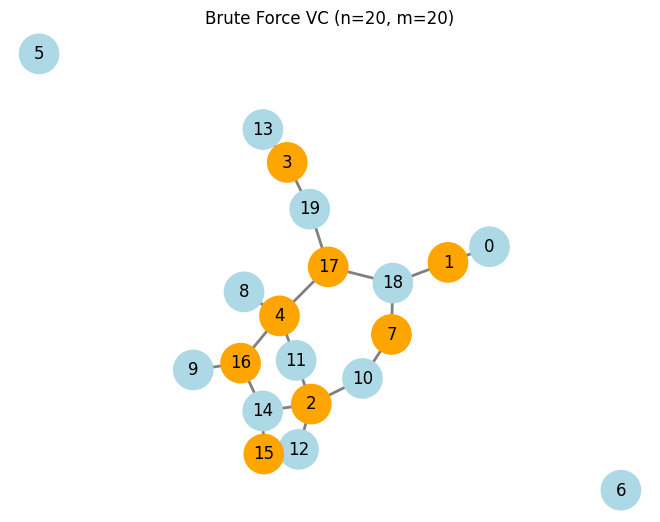

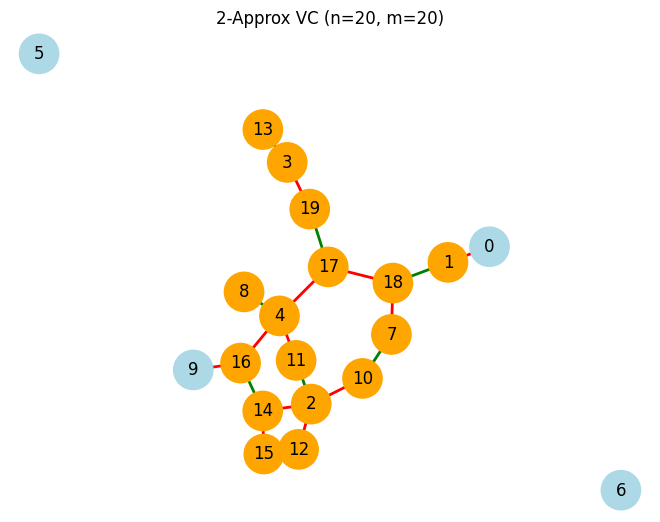


Running experiment for n=20, m=40
Brute Force Vertex Cover: {0, 3, 4, 6, 9, 10, 11, 12, 14, 17, 18}
Size: 11, Time: 0.636513 sec
2-Approximation Vertex Cover: {0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 16, 17, 18, 19}
Size: 16, Time: 0.000101 sec
Approximation Factor: 1.455


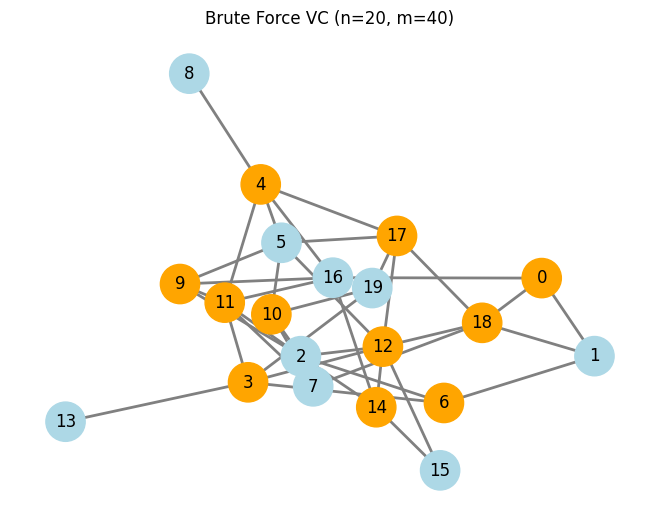

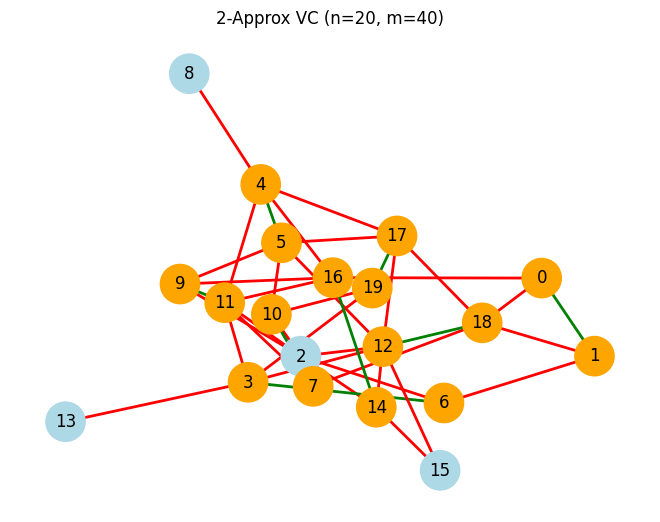


Running experiment for n=20, m=60
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 7, 9, 12, 15, 16, 17, 19}
Size: 13, Time: 1.937382 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Size: 20, Time: 0.000187 sec
Approximation Factor: 1.538


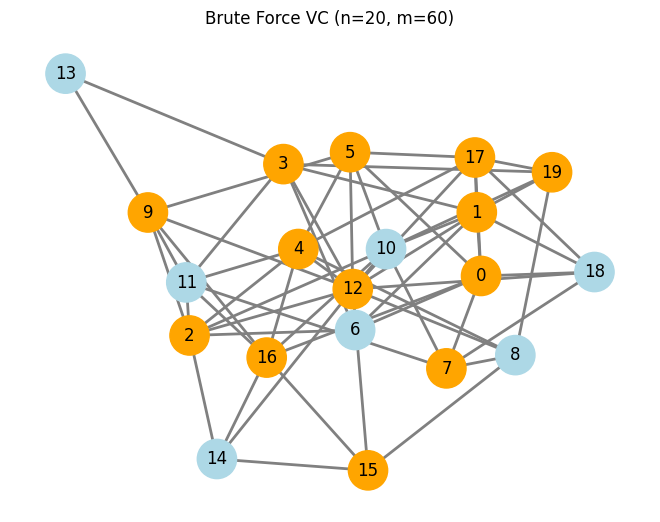

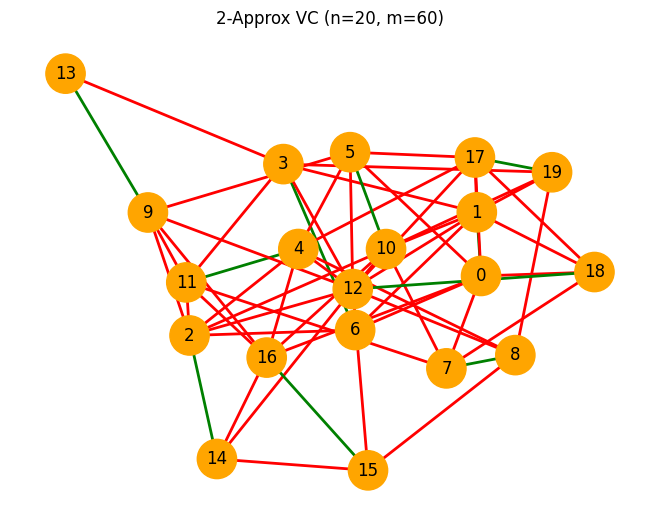


Running experiment for n=20, m=80
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 7, 9, 12, 15, 16, 18, 19}
Size: 13, Time: 2.617897 sec
2-Approximation Vertex Cover: {0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Size: 18, Time: 0.014330 sec
Approximation Factor: 1.385


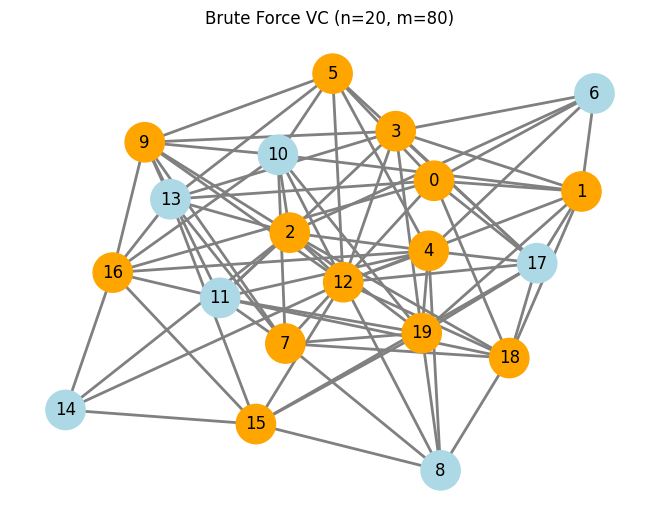

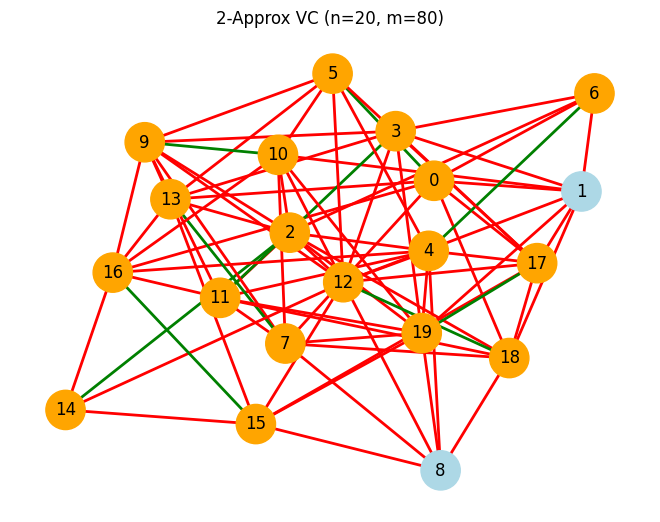


Running experiment for n=20, m=100
Brute Force Vertex Cover: {0, 1, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19}
Size: 15, Time: 3.284941 sec
2-Approximation Vertex Cover: {1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Size: 18, Time: 0.000398 sec
Approximation Factor: 1.200


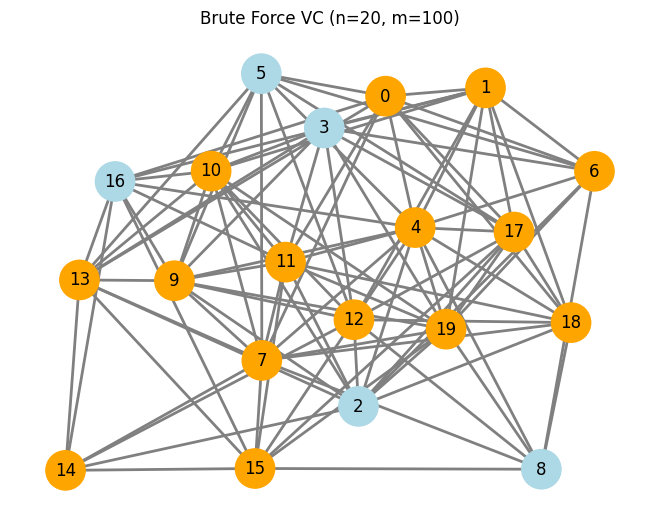

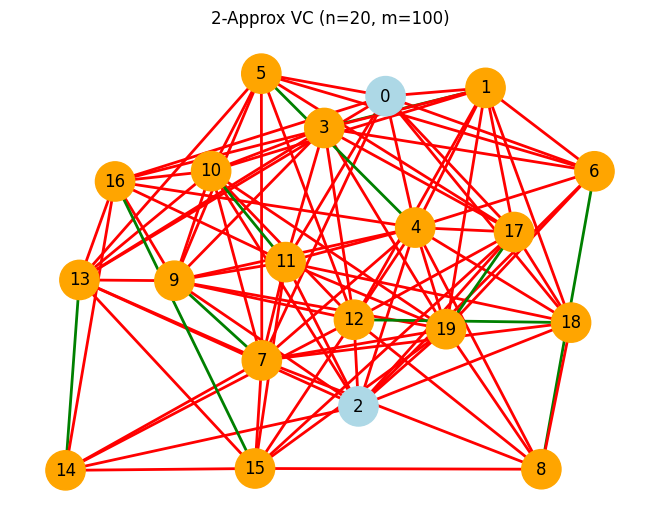


Running experiment for n=20, m=120
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 19}
Size: 16, Time: 1.788090 sec
2-Approximation Vertex Cover: {1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Size: 18, Time: 0.000283 sec
Approximation Factor: 1.125


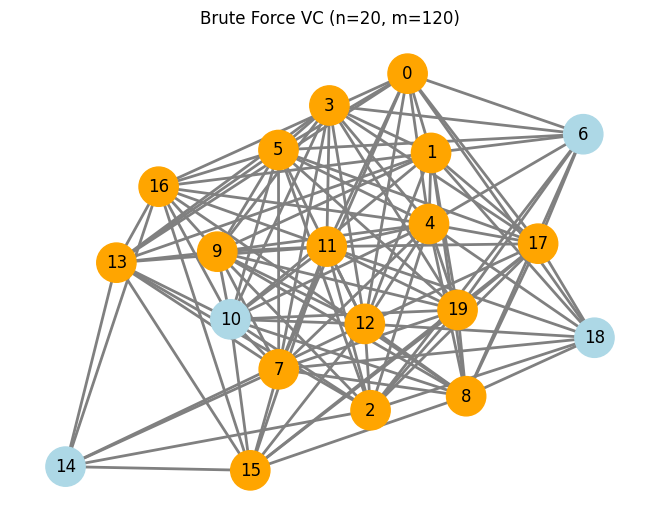

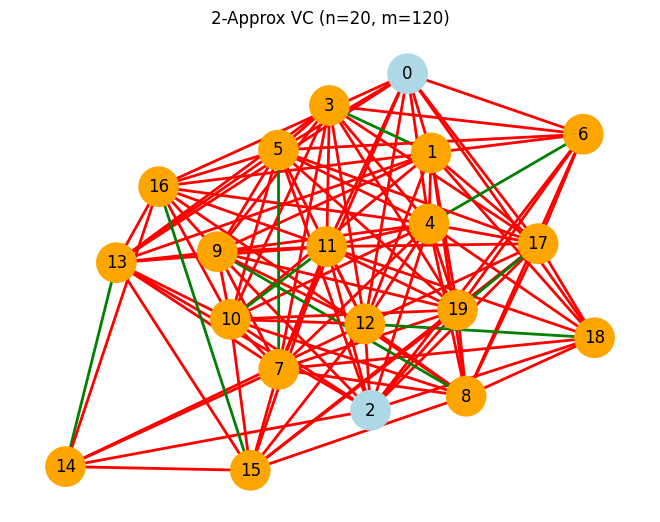


Running experiment for n=20, m=140
Brute Force Vertex Cover: {1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19}
Size: 16, Time: 1.179616 sec
2-Approximation Vertex Cover: {1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Size: 18, Time: 0.000372 sec
Approximation Factor: 1.125


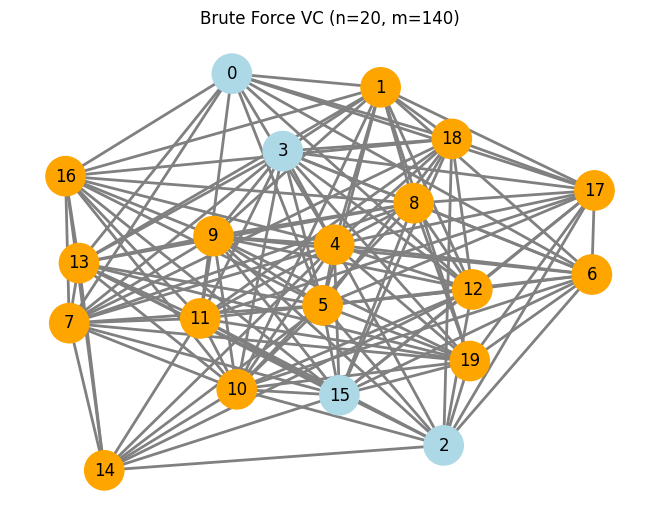

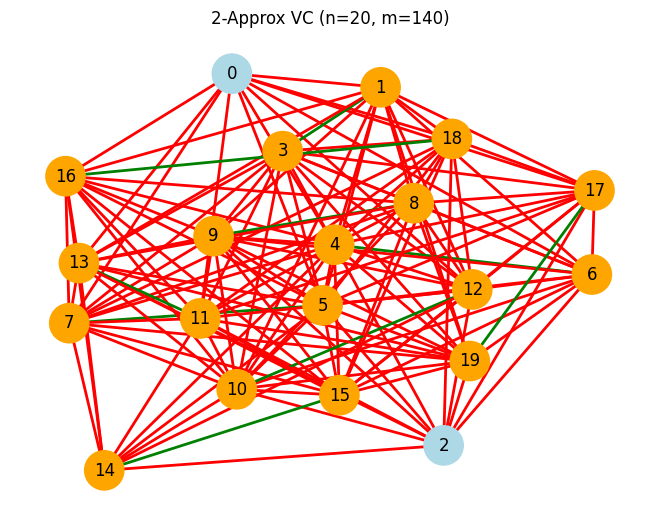


Running experiment for n=20, m=160
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 19}
Size: 17, Time: 1.287322 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Size: 20, Time: 0.000465 sec
Approximation Factor: 1.176


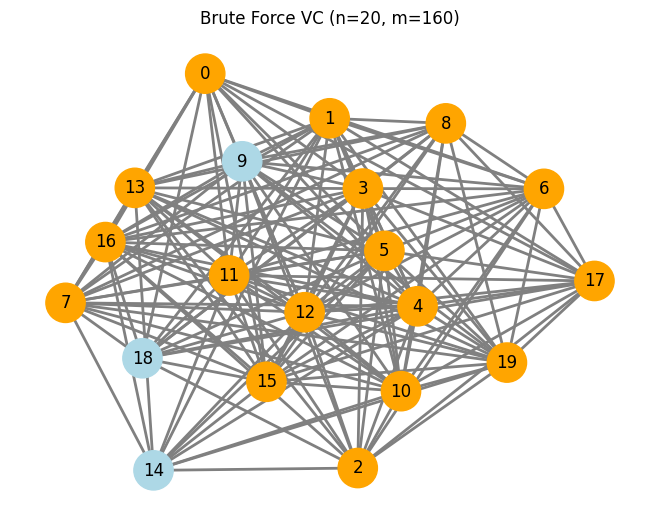

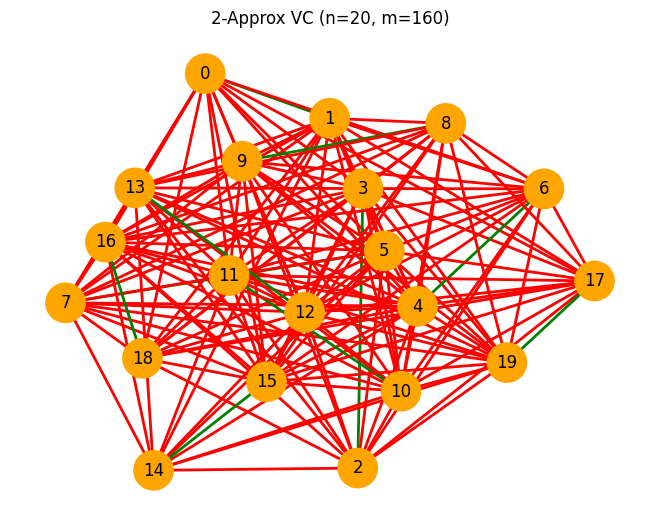


Running experiment for n=20, m=180
Brute Force Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}
Size: 18, Time: 1.386880 sec
2-Approximation Vertex Cover: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Size: 20, Time: 0.000551 sec
Approximation Factor: 1.111


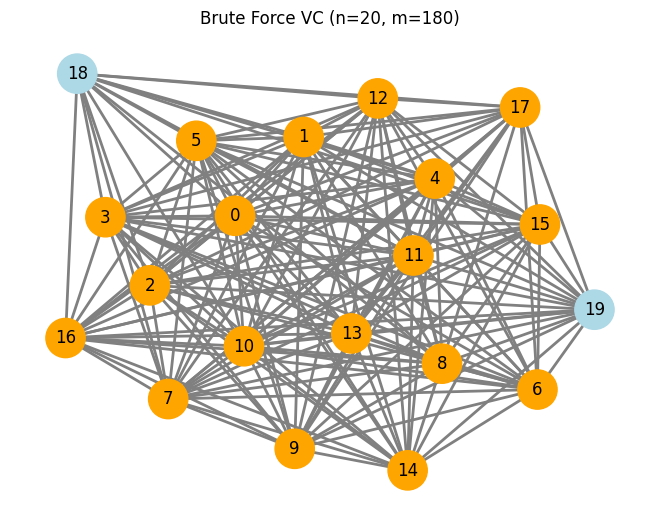

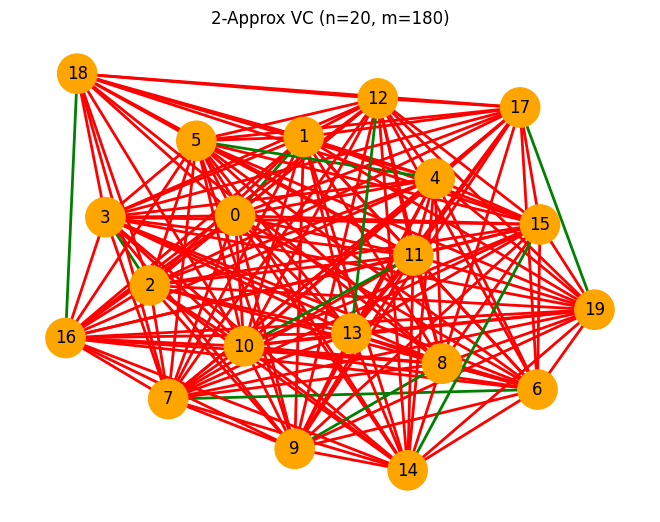


✅ Results saved to vertex_cover_results_n20.csv


In [10]:
# --- Read from file ---
with open("inputs.txt", "r") as f:
    lines = f.readlines()
    n = int(lines[0].strip())  # first line = number of nodes
    m_values = list(map(int, lines[1].strip().split(",")))  # second line = edge counts
results = []

for m in m_values:
    print("\n==============================")
    print(f"Running experiment for n={n}, m={m}")
    print("==============================")

    # Generate random graph
    graph = nx.gnm_random_graph(n, m, seed=46)
    nodes = list(graph.nodes())
    edges = list(graph.edges())

    # Brute Force
    start = time.time()
    cover_bf, edges_bf = minimum_vertex_cover(nodes, edges)
    time_bf = time.time() - start
    print(f"Brute Force Vertex Cover: {cover_bf}")
    print(f"Size: {len(cover_bf)}, Time: {time_bf:.6f} sec")

    # Greedy 2-Approximation
    start = time.time()
    cover_2a, used_edges, deleted_edges = vertex_cover_2approx(edges)
    time_2a = time.time() - start
    print(f"2-Approximation Vertex Cover: {cover_2a}")
    print(f"Size: {len(cover_2a)}, Time: {time_2a:.6f} sec")

    # Approximation Factor
    approx_factor = len(cover_2a) / len(cover_bf)
    print(f"Approximation Factor: {approx_factor:.3f}")

    # Record results
    results.append([
        n, m,
        len(cover_bf), f"{time_bf:.6f}",
        len(cover_2a), f"{time_2a:.6f}",
        f"{approx_factor:.3f}"
    ])

    # Draw Results (optional)
    draw_graph(graph, cover_bf, [], [], f"Brute Force VC (n={n}, m={m})")
    draw_graph(graph, cover_2a, used_edges, deleted_edges, f"2-Approx VC (n={n}, m={m})")

# Save results to CSV
import csv
with open("vertex_cover_results_n20.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow([
        "n", "m",
        "BruteForce_Size", "BruteForce_Time",
        "Greedy_Size", "Greedy_Time",
        "Approximation_Factor"
    ])
    writer.writerows(results)

print("\n✅ Results saved to vertex_cover_results_n20.csv")